In [5]:
tabla_colima['Hr LAADS (UTC)'].apply(lambda x: True if x is n)

SyntaxError: invalid syntax (<ipython-input-5-0f3698f21924>, line 1)

In [6]:
import pandas as pd
from datetime import time

In [3]:
tabla = pd.read_excel("database_Colima_CRSV.xlsx", sheet_name="2003", header=0, index_col=0)

In [13]:
tabla.loc[tabla["Hr LAADS (UTC)"].apply(lambda x: isinstance(x, time))]

,Date Erptn,Hr VAAC (UTC),ASH,Hr LAADS (UTC),WD,FL,Vel Pluma
Event Num,,,,,,,
2,2003-05-02,16:24:00,NO,18:00:00,SO,150,10
3,2003-05-06,13:43:00,NO,17:35:00,NO,200,20
7,2003-05-28,01:14:00,SI,04:45:00,NE,200,15
9,2003-07-10,13:25:00,SI,18:15:00,O,180,20
10,2003-07-11,01:45:00,SI,05:10:00,O,230,20
11,2003-07-15,14:15:00,SI,16:55:00,NE,300,15
12,2003-08-03,12:39:00,SI,17:25:00,ONO,250,15
13,2003-08-04,12:55:00,SI,18:10:00,O,200,15
14,2003-08-05,15:55:00,NO,17:15:00,O,250,15


In [7]:
import numpy as np

In [7]:
type(tabla["Hr LAADS (UTC)"].values[1])

datetime.time

In [11]:
isinstance(4, str)

False

In [8]:
exc = pd.ExcelFile("database_Colima_CRSV.xlsx")

In [9]:
hojas = exc.sheet_names

In [10]:
tablas = []
vel = []
for hoja in hojas:
    tabla = pd.read_excel("database_Colima_CRSV.xlsx", sheet_name=hoja, header=0, index_col=0)
    cols = tabla.columns
    correcto = [col for col in cols if col.startswith("Hr")][1]
    tp = tabla.loc[tabla[correcto].apply(lambda x: isinstance(x, time))]
    tablas.append(tp)
    vel.append(tp['Vel Pluma'].values)

In [23]:
tablas

[          Date Erptn Hr VAAC (UTC)  ASH Hr LAADS (UTC)   WD   FL  Vel Pluma
 Event Num                                                                  
 2         2003-05-02      16:24:00   NO       18:00:00   SO  150         10
 3         2003-05-06      13:43:00   NO       17:35:00   NO  200         20
 7         2003-05-28      01:14:00   SI       04:45:00   NE  200         15
 9         2003-07-10      13:25:00   SI       18:15:00    O  180         20
 10        2003-07-11      01:45:00   SI       05:10:00    O  230         20
 11        2003-07-15      14:15:00   SI       16:55:00   NE  300         15
 12        2003-08-03      12:39:00   SI       17:25:00  ONO  250         15
 13        2003-08-04      12:55:00   SI       18:10:00    O  200         15
 14        2003-08-05      15:55:00  NO        17:15:00    O  250         15
 16        2003-09-06      15:26:00   SI       17:15:00   ND  220         10
 17        2003-09-08      12:20:00   NO       17:00:00   NO  250         10

In [11]:
import matplotlib.pyplot as plt

In [17]:
cosa = (np.hstack(vel)).astype(dtype=float)

In [18]:
cosa

array([10., 20., 15., 20., 20., 15., 15., 15., 15., 10., 10., 10., 10.,
        5., 10., 15., 10., 10., 10., 25., 20., 20., 20., 50., 15., 35.,
       25., 15., 20., 20., 25., 30., 15., 10., 10., 15., 20., 20., 15.,
       30., 20., 20., 25., 20., 15., 20., 30., 25., 25., 10., 20., 20.,
       35., 20., 25., 20., 20., 25., 15., 15., 20., 60., 25., 60., 20.,
       15., 10., 15., 20.,  5., 30., 30., 10., 20., 10., 35., 20., 25.,
       10.,  5., 35., 30., 15., 10., 15., 20., 10., 25., 15., 10., 10.,
       15., 15., 15., 10., 15., 10., 10., 15., 15., 15., 10., 15., 10.,
       15., 10.,  5.,  5., 10., 15., 20., 10., 10., 15., 25., 15., 15.,
       25., 20., 20., 15., 10., 10.,  5., 10., 15., 20., 20., 25., 15.,
       20., 20., 15., 10., 10.,  5., 35., 20., 10., 15., 10., 15., 15.,
       20., 15., 18., 20., 15., 20., 20., 10., 30., 25., 20., 20., 25.,
       10., 10., 15., 15., 10.,  5., 20., 15., 10., 15., 25., 25., 25.,
       15., 20., 10., 10., 10., 10., 25., 20., 15., 30., 20., 15

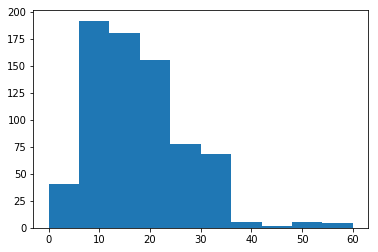

In [20]:
plt.hist(cosa, bins=10)
plt.show()